<a href="https://colab.research.google.com/github/ksydata/Algorithm_DataStructure/blob/main/Tree_to_heap_SY_231124.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from abc import ABC, abstractmethod
import sys
from typing import *

### 1.트리 순회

* 트리 순회
  
  자료구조에 저장된 모든 데이터를 도는 순회를 위해서는 어떤 순서로 데이터를 출력할 수 있는지 알아야 한다. (재귀의 문제)

  재귀 함수를 호출하는 대신 방문할 노드를 스택에 저장하고, 스택이 빌 때까지 반복문으로 순회하는 방식으로 구현할 수 있다.

  (1) 재귀적으로 왼쪽 서브 트리를 순회 (2) 재귀적으로 오른쪽 서브 트리를 순회 (3) 현재 노드 데이터를 출력

  데이터 간 계층적 관계를 나타내는 트리도 순회를 하면 노드들 사이에 앞과 뒤라는 선형적 순서를 만들 수 있다.

* pre-order 순회 (3) - (1) - (2)

* post-order 순회 (1) - (2) - (3)

* in-order 순회 (1) - (3) - (2) 왼쪽 자식 노드에 더 이상 반환할 값이 없으면

* in-order 순회 구현하기

In [2]:
class Node:
  """이진 트리 노드를 나타내는 클래스"""
  def __init__(self, data: any):
    """데이터와 왼쪽, 오른쪽 자식 노드에 대한 레퍼런스를 가지는 이진 트리 노드"""
    self.data = data
    self.left_childnode = None
    self.right_childnode = None

def inorder_traversal(node):
  """연결 리스트로 구현 | 계속 왼쪽으로 순회하면 리프노드가 나오고, 자식 노드가 None이 되어 순회를 완료"""
  if node is None:
    inorder_traversal(node.left_childnode)
    # 재귀적으로 왼쪽 서브 트리 순회
    print(node.data)
    # 현재 노드 데이터를 출력
    inorder_traversal(node.right_childnode)
    # 재귀적으로 오른쪽 서브 트리 순회

In [3]:
# 노드 인스턴스 생성
node_A = Node("A")
node_B = Node("B")
node_C = Node("C")
node_D = Node("D")
node_E = Node("E")
node_F = Node("F")
node_G = Node("G")
node_H = Node("H")
node_I = Node("I")

In [4]:
# 생성한 노드 인스턴스를 연결
node_F.left_childnode = node_B
node_F.right_childnode = node_G

# F-B-A, F-B-D
node_B.left_childnode = node_A
node_B.right_childnode = node_D

# F-B-D-C, F-B-D-E
node_D.left_childnode = node_C
node_D.right_childnode = node_E

node_F.left_childnode = node_B
node_F.right_childnode = node_G

# F-G-I-H
node_G.left_childnode = node_I
node_I.left_childnode = node_H

In [5]:
# F 노드를 루트 노드로 만든다
root_node = node_F

In [6]:
# 만들어 놓은 트리를 in-order 방식으로 순회한다.
inorder_traversal(node = root_node)

* [코딩테스트] 백준 트리의 순회 1991번(2263번 꼭 풀어볼 것)

    ```
    문제
    이진 트리를 입력받아 전위 순회(preorder traversal), 중위 순회(inorder traversal), 후위 순회(postorder traversal)한
    결과를 출력하는 프로그램을 작성하시오.

    입력
    예를 들어 위와 같은 이진 트리가 입력되면,
    전위 순회한 결과 : ABDCEFG // (루트) (왼쪽 자식) (오른쪽 자식)
    중위 순회한 결과 : DBAECFG // (왼쪽 자식) (루트) (오른쪽 자식)
    후위 순회한 결과 : DBEGFCA // (왼쪽 자식) (오른쪽 자식) (루트)

    첫째 줄에는 이진 트리의 노드의 개수 N(1 ≤ N ≤ 26)이 주어진다.
    둘째 줄부터 N개의 줄에 걸쳐 각 노드와 그의 왼쪽 자식 노드, 오른쪽 자식 노드가 주어진다.
    노드의 이름은 A부터 차례대로 알파벳 대문자로 매겨지며, 항상 A가 루트 노드가 된다.
    자식 노드가 없는 경우에는 .으로 표현한다.

    출력
    첫째 줄에 전위 순회, 둘째 줄에 중위 순회, 셋째 줄에 후위 순회한 결과를 출력한다.
    각 줄에 N개의 알파벳을 공백 없이 출력하면 된다.
    ```


In [8]:
# int를 사용하여 입력 값을 정수로 변환
n = int(input("트리의 사이즈(총 노드의 수)를 입력: "))
  # TypeError: 'str' object cannot be interpreted as an integer

트리의 사이즈(총 노드의 수)를 입력: 100


In [16]:
input = sys.stdin.readline
sys.setrecursionlimit(10**8)

# 딕셔너리로 트리 구현
tree = {}
for i in range(n):
    root, left, right = map(str, input().split())
      # ValueError: not enough values to unpack (expected 3, got 1)
    tree[root] = left, right
      # {"Root": ("Left Child Node", "Right Child Node")}
      # tree.key = "Root", tree.values = (("Left Child Node", "Right Child Node")}

In [10]:
class Node:
  """이진 트리 노드 클래스"""
  def __init__(self, data):
    """레퍼런스"""
    self.data = data
    self.left_childnode = None
    self.right_childnode = None

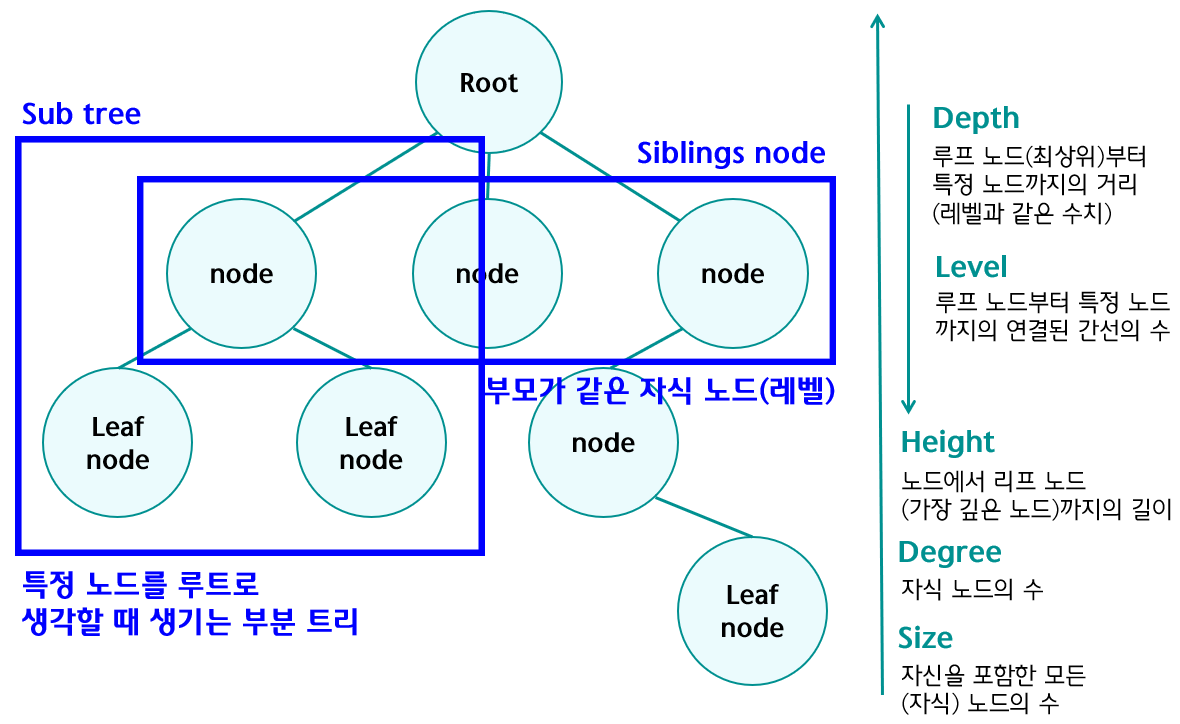

In [14]:
def traversal_preorder(node: Node):
  """트리 전위 순회(루트 - 왼 - 오) 메서드
  if node.data is not None:
    print(node.data, end = "")
  if node.left_childnode is not None:
    traversal_preorder( tree[node.left_childnode] )
  if node.left_childnode is not None:
    traversal_preorder( tree[node.right_childnode] )
  """
  if node.data != ".":
  # 루트 노트가 .이 아니면 (자식이 있다면)
    print(node.data, end="")
    traversal_preorder(tree[node.data][0])
    traversal_preorder(tree[node.data][1])

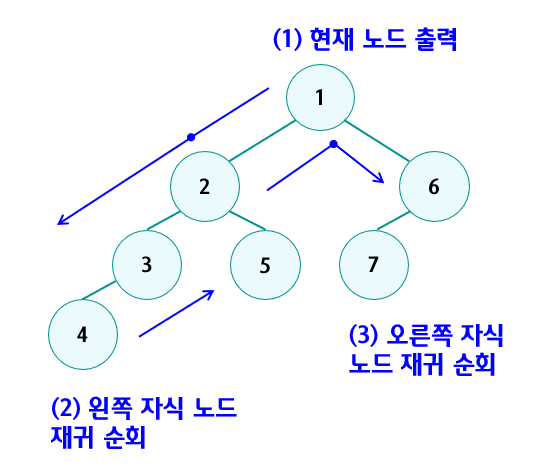

In [10]:
def traversal_inorder(node: Node):
  """트리 중위 순회(왼 - 루트 - 오) 메서드
  부모 노드를 기준으로 왼쪽과 오른쪽 서브 트리가 나뉜다
  if node.left_childnode is not None:
  # if node.left != '.':
    traversal_inorder( tree[node.left_childnode] )
  print(node.data, end = "")
  if node.right_childnode is not None:
    traversal_inorder( tree[node.right_childnode] )
  """
  if node.data != ".":
    traversal_preorder(tree[node.data][0])
    print(node.data, end="")
    traversal_preorder(tree[node.data][1])

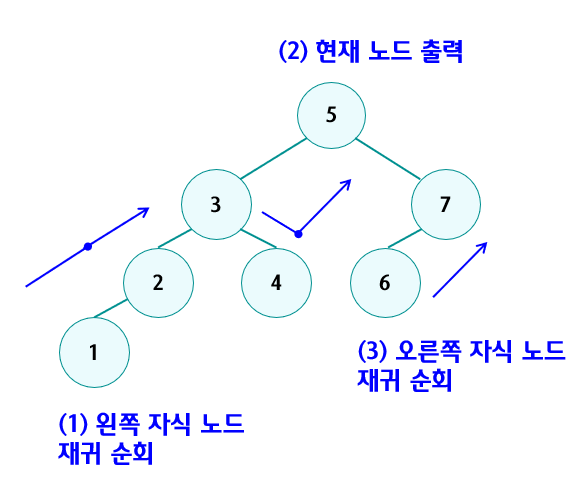

In [16]:
def traversal_postorder(node: any):
  """트리 후위 순회(왼 - 오 - 루트) 메서드
  if node.left_childnode is not None:
    traversal_postorder( tree[node.left_childnode] )
  if node.right_childnode is not None:
    traversal_postorder( tree[node.right_childnode] )
  print(node.data, end = "")
  """
  if node.data != ".":
    traversal_preorder(tree[node.data][0])
    traversal_preorder(tree[node.data][1])
    print(node.data, end="")

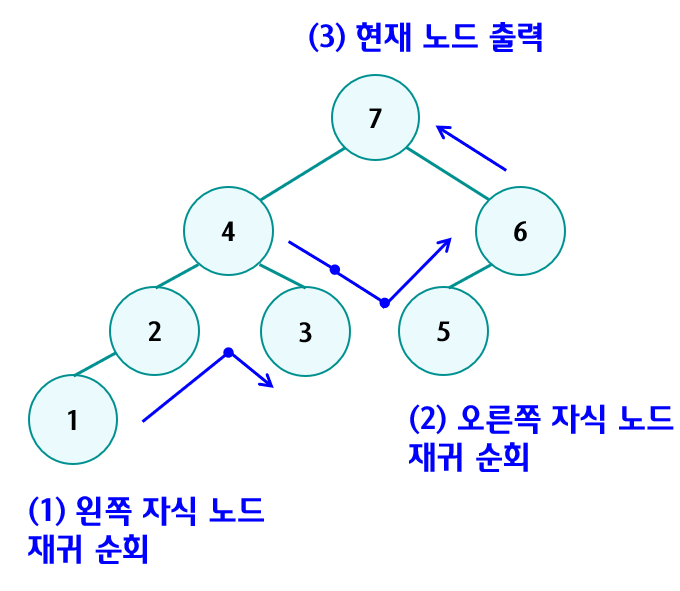

### 2.큐

* 배열, 링 버퍼를 통해 구현하는 큐
* 의사코드
```
클래스 큐:

    # append, push
    함수 노드를 삽입할 때:
      만약 빈 큐이면:
        front(가장 먼저 들어온 데이터를 받는 쪽)과 rear(가장 먼저 들어온 데이터를 꺼내는 쪽)가 모두 첫 노드를 가리키도록 한다.
      그렇지 않다면(빈 큐가 아니라면):
        rear의 next(후속 노드의 레퍼런스)가 새 노드를 가리키도록 한다.
        rear를 새 노드로 옮긴다.
        
    # pop, popleft
    함수 노드를 꺼낼 때:
      만약 빈 큐가 되면:
        front와 rear는 모두 None을 가리킨다.
      그렇지 않다면(큐에 노드가 남아있다면):
        front를 front의 next로 옮긴다.
```

* 요세푸스 순열 문제

    ```
    1번부터 N 번까지 N명의 사람이 원을 이루면서 앉아있고, 양의 정수 K(≤ N)가 주어진다.
    이제 순서대로 K 번째 사람을 제거한다. 한 사람이 제거되면 남은 사람들로 이루어진 원을 따라 이 과정을 계속해 나간다.
    이 과정은 N명의 사람이 모두 제거될 때까지 계속된다. 원에서 사람들이 제거되는 순서를 (N, K)-요세푸스 순열이라고 한다.
    예를 들어 (7, 3)-요세푸스 순열은 <3, 6, 2, 7, 5, 1, 4>이다.

    N과 K가 주어지면 (N, K)-요세푸스 순열을 구하는 프로그램을 작성하시오.
    남은 사람들이 원을 이루며 앉아 있고, 앞에서 K 번 뒤로 이동한 후 사람을 제거한다.
    다시 그 자리부터 뒤로 K 번 이동한 후 사람을 제거한다.
    따라서 배열(리스트)의 인덱스를 조작하여 문제를 해결할 수 있다.

    예시
    입력: 7, 3
    출력: [3, 6, 2, 7, 5, 1, 4]
    ```

### 3.힙(쌓아올린 더미)

* 힙 속성을 지키지 않은 노드가 맞는 위치를 찾을 때까지 데이터를 재배치하는 heapify 알고리즘
* 힙을 만든 후 루트 노드와 마지막 노드를 바꾼 후 바꾼 노드를 없는 노드 취급하는 heap sorting 알고리즘

### 4.우선순위 큐

* 힙을 통해 구현하는 우선순위 큐

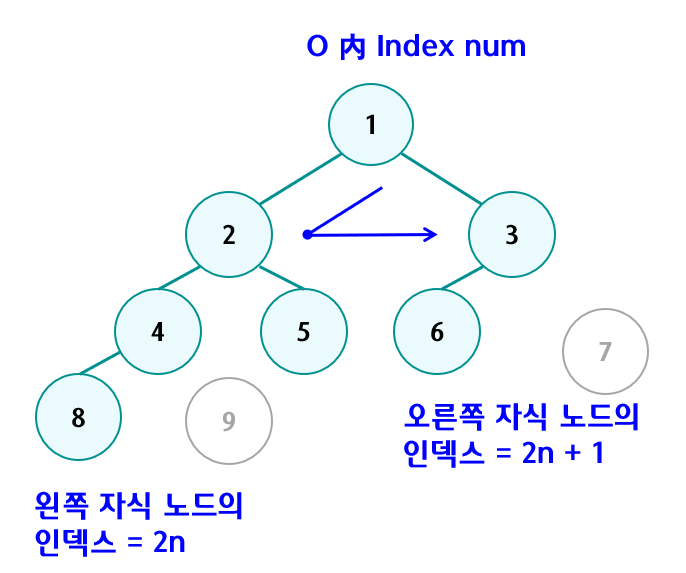